# BrainFrames

## Introduction

The goal of this project is to produce a dope set of videos for visualizing
the hodgkins-huxley model (this implementation can be found here: [\[Khare\]](https://github.com/sbkhare/HodgkinHuxley)) as a network graph.

(This is a growing list so far: description of hodgkins_huxley, smallworld, more to come, need their descriptions added may include their own seperate visuals later)

## Code

### Packages

In [10]:
import networkx as nx #For network specific operations
import numpy as np #utillity for accessing data
import hodgkin_huxley #Sikander's Implementation
from hodgkin_huxley import network as hhn
from IPython.display import HTML
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')

### Initialization
Here we create a huxley-hodgkins object. This first creates a network of 25 nodes and 
a 200 iteration count. The object *hh* is then initialized with the default parameters
provided by networkx for small world graph generation. Finally the model is run for the 
pre-specified iteration count.

The output is some traditional network statistics, a visualization of the generic graph
structure as a circle graph, and a heat mapped adjacency matrix.

Average shortest path length: 2.3983333333333334
Average clustering coefficient: 0.2165758983926657
(25, 11000)
(11000, 25) (25,)
(25, 11000) (25,)
(25, 11000)
(25, 11000) (11000,)
(25, 11000) (11000,)


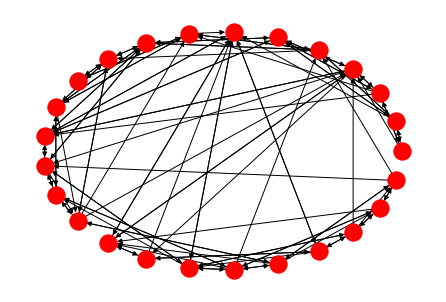

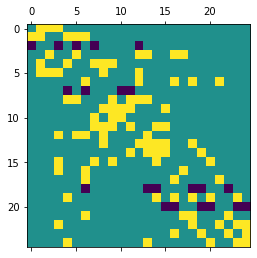

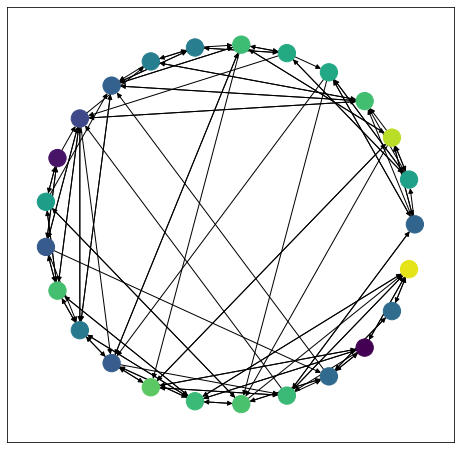

In [85]:
hh = hhn.HodgkinHuxley(25,11)
hh.initialize()
hh.simulate()

fig = plt.figure(figsize=(8,8))
pos=nx.drawing.nx_agraph.graphviz_layout(hh.network,prog='circo')

#Normalize node by values across time
print(hh.voltage.shape)

voltage = hh.voltage.transpose() - hh.voltage.mean(axis=1)
print(voltage.shape, hh.voltage.mean(axis=1).shape)

voltage = voltage.transpose() / np.abs(voltage).max(axis=1)
print(voltage.shape,np.abs(voltage).max(axis=1).shape)


#Normalize all nodes in a time step across nodes
print(hh.voltage.shape)

voltage = hh.voltage - hh.voltage.mean(axis=0)
print(voltage.shape, hh.voltage.mean(axis=0).shape)

voltage = voltage / np.abs(voltage).max(axis=0)
print(voltage.shape,np.abs(voltage).max(axis=0).shape)

nc= voltage[:,0]
nodes = nx.draw_networkx_nodes(hh.network,pos,node_color=nc,vmin = np.min(voltage),vmax=np.max(voltage) )
edges = nx.draw_networkx_edges(hh.network,pos) 


def update(n):
  nc = voltage[:,n]
  nodes.set_array(nc)
  return nodes,

anim = FuncAnimation(fig, update, blit=True)
HTML(anim.to_html5_video())


In [68]:
print(hh.voltage.shape)
print(len(hh.voltage.mean(axis=1)))
print(len(hh.voltage.mean(axis=0)))

(25, 500000)
25
500000


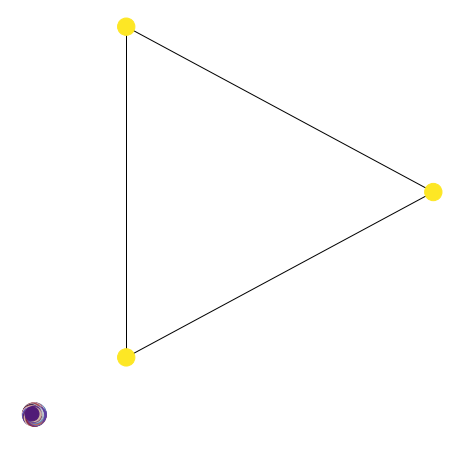

In [62]:
def colored_circle(network, nc = "red", ncmax = None, ncmin = None):
    nx.draw_circular(network, node_color = nc, vmin = ncmin, vmax = ncmax, cmap = "twilight")

#Might be fun to mess with springing constants as a function of network data
def colored_spring(network, nc = "red", ncmax = None, ncmin = None):
    pos = nx.spring_layout(network, iterations=200)
    nx.draw(network, pos, node_color=nc, node_size=200, cmap=plt.cm.twilight)

fig = plt.figure(figsize=(8,8))
pos=nx.drawing.nx_agraph.graphviz_layout(G,prog='circo')
nc = np.random.random(3)
nodes = nx.draw_networkx_nodes(G,pos,node_color=nc)
edges = nx.draw_networkx_edges(G,pos) 

def update(n):
  nc = np.random.random(3)
  nodes.set_array(nc)
  return nodes,

anim = FuncAnimation(fig, update, interval=50, blit=True)
HTML(anim.to_html5_video())

ncmax = np.amax(hh.voltage)
ncmin = np.amin(hh.voltage)
colored_circle(hh.network, hh.voltage[:,0],ncmax = ncmax, ncmin=ncmin)
colored_spring(hh.network, hh.voltage[:,0],ncmax = ncmax, ncmin=ncmin)

TypeError: object of type 'PathCollection' has no len()

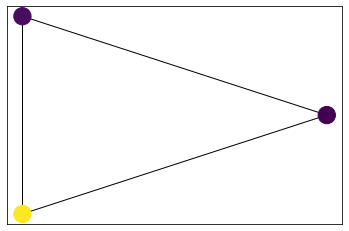

<Figure size 576x576 with 0 Axes>

In [33]:
class BrainFrames:
    def __init__(self, graph, height = 8, width = 8, blit=True): 
        pos=nx.drawing.nx_agraph.graphviz_layout(graph,prog='circo')
        nc = np.random.random(3)
        self.nodes = nx.draw_networkx_nodes(graph,pos,node_color=nc)
        self.edges = nx.draw_networkx_edges(graph,pos) 
        self.fig = plt.figure(figsize=(height,width))
        self.blit = blit

    def update(self, frame_number):
        nc = np.random.random(3)
        nodes.set_array(nc)
        return self.nodes,
    
    def video(self):
        return FuncAnimation(self.fig, self.update, interval=50, blit=self.blit)
    
    def embed(self):
        return

G = nx.Graph()
G.add_edges_from([(0,1),(1,2),(2,0)])
bf = BrainFrames(G)
bf.embed()
HTML(bf.video().to_html5_video())

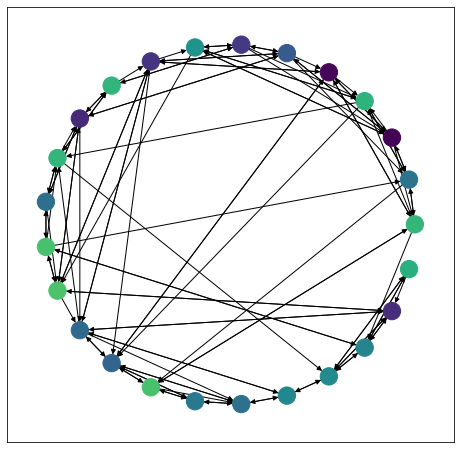

In [49]:
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

G = nx.Graph()
G.add_edges_from([(0,1),(1,2),(2,0)])
fig = plt.figure(figsize=(8,8))
pos=nx.drawing.nx_agraph.graphviz_layout(hh.network,prog='circo')


nc= hh.voltage[:,0]
nodes = nx.draw_networkx_nodes(hh.network,pos,node_color=nc)
edges = nx.draw_networkx_edges(hh.network,pos) 

def update(n):
  nc = hh.voltage[:,n]
  nodes.set_array(nc)
  return nodes,

anim = FuncAnimation(fig, update, interval=50, blit=True)
HTML(anim.to_html5_video())

{0: (27.0, 18.0), 1: (27.0, 122.2), 2: (117.24, 70.101)}


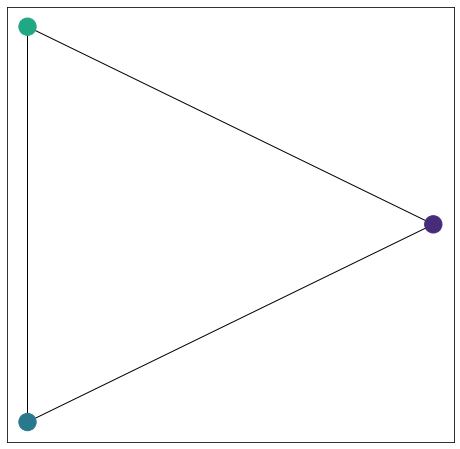

In [38]:
import numpy as np
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

G = nx.Graph()
G.add_edges_from([(0,1),(1,2),(2,0)])
fig = plt.figure(figsize=(8,8))
pos=nx.drawing.nx_agraph.graphviz_layout(G,prog='circo')
print(pos)
nc = np.random.random(3)
nodes = nx.draw_networkx_nodes(G,pos,node_color=nc)
edges = nx.draw_networkx_edges(G,pos) 

def update(n):
  nc = np.random.random(3)
  nodes.set_array(nc)
  return nodes,

anim = FuncAnimation(fig, update, interval=50, blit=True)
HTML(anim.to_html5_video())